# Exponential Distribution Sampling

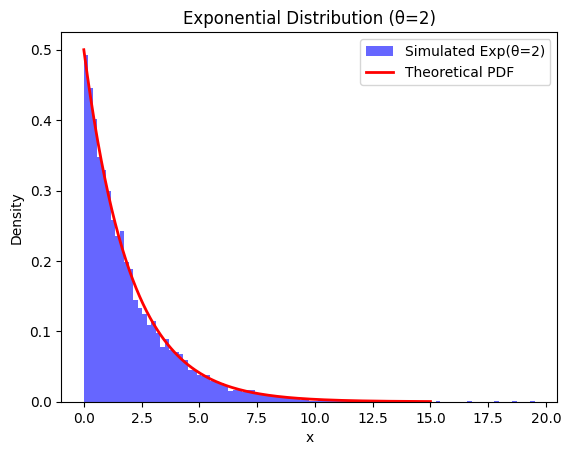

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 파라미터 설정
theta = 2
n_samples = 10000

# Uniform(0,1) 난수 생성
U = np.random.rand(n_samples)

# Inverse Transform Method로 지수분포 난수 생성
X = -theta * np.log(U)

# 시뮬레이션 히스토그램
plt.hist(X, bins=100, density=True, alpha=0.6, color='b', label='Simulated Exp(θ=2)')

# 이론적 PDF (Exponential distribution)
x_vals = np.linspace(0, 15, 200)
pdf_vals = (1/theta) * np.exp(-x_vals/theta)
plt.plot(x_vals, pdf_vals, 'r-', linewidth=2, label='Theoretical PDF')

# 그래프 설정
plt.title("Exponential Distribution (θ=2)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


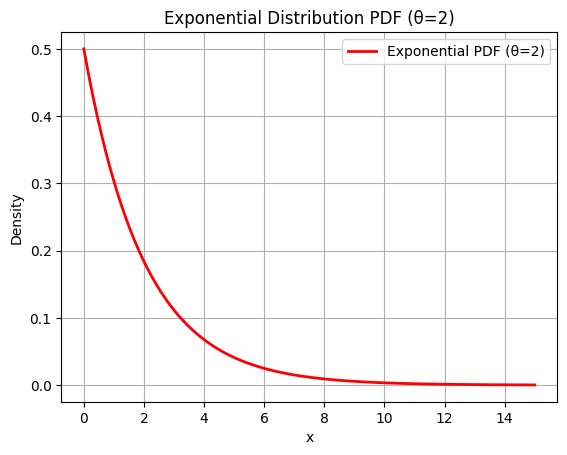

In [ ]:
# 파라미터 설정
theta = 2

# x축 구간 (0 ~ 15까지 200개의 점)
x_vals = np.linspace(0, 15, 200)

# 지수분포 PDF
pdf_vals = (1/theta) * np.exp(-x_vals/theta)

# 그래프 그리기
plt.plot(x_vals, pdf_vals, 'r-', linewidth=2, label='Exponential PDF (θ=2)')
plt.title("Exponential Distribution PDF (θ=2)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


# Exponential Distribution CDF

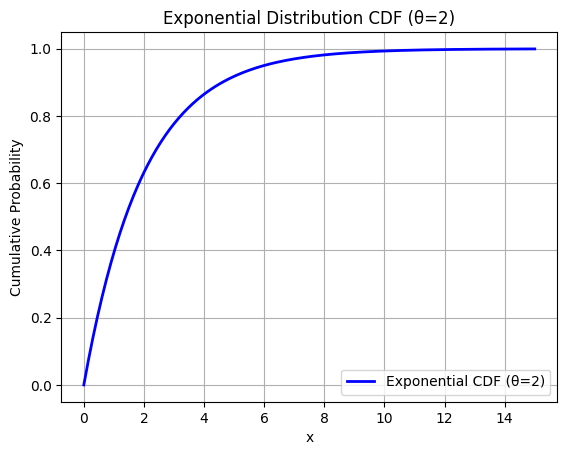

In [ ]:
# 파라미터 설정
theta = 2

# x축 구간 (0 ~ 15까지 200개의 점)
x_vals = np.linspace(0, 15, 200)

# 지수분포 CDF
cdf_vals = 1 - np.exp(-x_vals/theta)

# 그래프 그리기
plt.plot(x_vals, cdf_vals, 'b-', linewidth=2, label='Exponential CDF (θ=2)')
plt.title("Exponential Distribution CDF (θ=2)")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()


# Beta Distribution Sampling

alpha1=3, alpha2=2
c = 1.7778
Acceptance rate ≈ 0.561


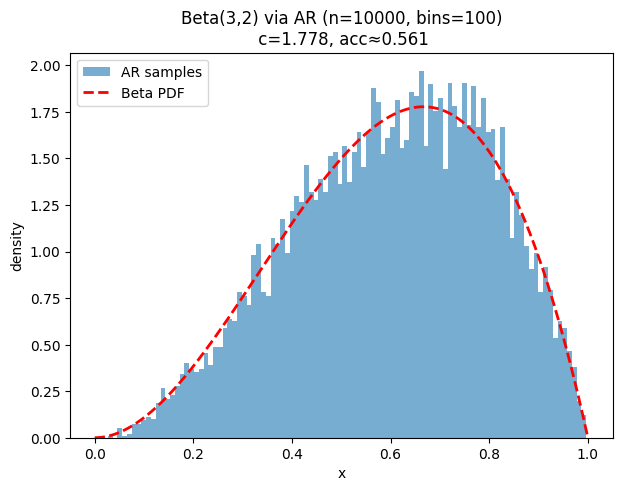

In [1]:
import math, random
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Beta PDF & Helper functions
# -----------------------------
def beta_func(a, b):
    return math.gamma(a) * math.gamma(b) / math.gamma(a + b)

def beta_pdf(x, a, b):
    if x < 0.0 or x > 1.0:
        return 0.0
    B = beta_func(a, b)
    if x == 0.0:
        return 0.0 if a > 1 else float('inf')
    if x == 1.0:
        return 0.0 if b > 1 else float('inf')
    return (x**(a - 1)) * ((1 - x)**(b - 1)) / B

def uniform_envelope_c(a, b):
    if a < 1 or b < 1:
        raise ValueError("With a<1 or b<1, Uniform proposal gives infinite c. "
                         "Use a different proposal distribution.")
    if a > 1 and b > 1:
        x_mode = (a - 1) / (a + b - 2)
    elif a == 1 and b > 1:
        x_mode = 0.0
    elif b == 1 and a > 1:
        x_mode = 1.0
    else:  # a==1 and b==1
        return 1.0
    return beta_pdf(x_mode, a, b)

# -----------------------------
# AR Sampling for Beta(a,b)
# -----------------------------
def ar_sample_beta(a, b, n, seed=None):
    c = uniform_envelope_c(a, b)
    rng = random.Random(seed)
    samples = []
    trials = 0
    while len(samples) < n:
        u1 = rng.random()
        u2 = rng.random()
        if u2 <= beta_pdf(u1, a, b) / c:
            samples.append(u1)
        trials += 1
    acc_rate = n / trials
    return np.array(samples), c, acc_rate

# -----------------------------
# Main: example run
# -----------------------------
if __name__ == "__main__":
    a, b = 3, 2        # 원하는 파라미터
    n_samples = 10000  # accepted 표본 개수
    seed = 42

    samples, c, acc_rate = ar_sample_beta(a, b, n_samples, seed)

    print(f"alpha1={a}, alpha2={b}")
    print(f"c = {c:.4f}")
    print(f"Acceptance rate ≈ {acc_rate:.3f}")

    # Histogram vs PDF
    xs = np.linspace(0, 1, 400)
    pdf_vals = [beta_pdf(x, a, b) for x in xs]

    plt.figure(figsize=(7,5))
    plt.hist(samples, bins=100, density=True, alpha=0.6, label="AR samples")
    plt.plot(xs, pdf_vals, 'r--', linewidth=2, label="Beta PDF")
    plt.title(f"Beta({a},{b}) via AR (n={n_samples}, bins=100)\n c={c:.3f}, acc≈{acc_rate:.3f}")
    plt.xlabel("x")
    plt.ylabel("density")
    plt.legend()
    plt.show()
